# 3 Period English Analysis

## 1. Moduel Import
## 2. Data Load
## 3. Preprocess
> #### 3-1) Data Cleaning ; 특수 문자 등 제거
## 4. Analysis
> #### 4-1) Tag 별 분포와 비율
> #### 4-2) Topic Modeling (LDA)
> #### 4-3) WordCloud
> #### ~~4-4) Network web analysis~~

## 1. Module Import

In [113]:
# self defined Modules
from myModules.ST.DataLoader import DataLoader
from myModules.ST.cleaning import cleaning
from myModules.ST.tokenizing import tokenizing
from myModules.ST.stopwords import removeStopWords
from myModules.ST.tagging import tagging
from myModules.ST.mergeOverPeriod import merge
from myModules.ST.plotFrequency import plotOverallFrequency

# General Modules
import pandas as pd
import numpy as np
import warnings
from tqdm.notebook import tqdm

warnings.filterwarnings('ignore')

# Read File
import glob

# NLP
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk import FreqDist
from wordcloud import WordCloud

# Visualization
import pyLDAvis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Data Load

In [110]:
DATA_ROOT = './Data/3구간/'

PERIOD_1 = DATA_ROOT + '1시기/1시기_ST/'
PERIOD_2 = DATA_ROOT + '2시기/2시기_ST/'
PERIOD_3 = DATA_ROOT + '3시기/3시기_ST/'

RESULT_ROOT = './Result/3구간/'

RESULT_1 = RESULT_ROOT + '/1시기/ST/'
RESULT_2 = RESULT_ROOT + '/2시기/ST/'
RESULT_3 = RESULT_ROOT + '/3시기/ST/'

In [26]:
files_1 = glob.glob(PERIOD_1+'*.txt')
files_2 = glob.glob(PERIOD_2+'*.txt')
files_3 = glob.glob(PERIOD_3+'*.txt')

texts_1 = DataLoader(files_1)
texts_2 = DataLoader(files_2)
texts_3 = DataLoader(files_3)

## 3. PreProcess

### Data Cleaning

In [50]:
cleaned_1 = cleaning(texts_1)
cleaned_2 = cleaning(texts_2)
cleaned_3 = cleaning(texts_3)

### Tokenize

In [59]:
tokenizer = TreebankWordTokenizer()

tokenized_1 = tokenizing(cleaned_1, tokenizer)
tokenized_2 = tokenizing(cleaned_2, tokenizer)
tokenized_3 = tokenizing(cleaned_3, tokenizer)

### Remove Stopwords

In [66]:
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords = ['would', 'could', 'might', 'need', 'can', 'must']

wo_stopword_1 = removeStopWords(tokenized_1, stopwords, new_stopwords)
wo_stopword_2 = removeStopWords(tokenized_2, stopwords, new_stopwords)
wo_stopword_3 = removeStopWords(tokenized_3, stopwords, new_stopwords)

### Tagging

In [80]:
tagged_1 = tagging(tokenized_1)
tagged_2 = tagging(tokenized_2)
tagged_3 = tagging(tokenized_3)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

## 4. Analysis

### Frequency


In [84]:
merged_1 = merge(tokenized_1)
merged_2 = merge(tokenized_2)
merged_3 = merge(tokenized_3)

wo_merged_1 = merge(wo_stopword_1)
wo_merged_2 = merge(wo_stopword_2)
wo_merged_3 = merge(wo_stopword_3)

#### Period 1

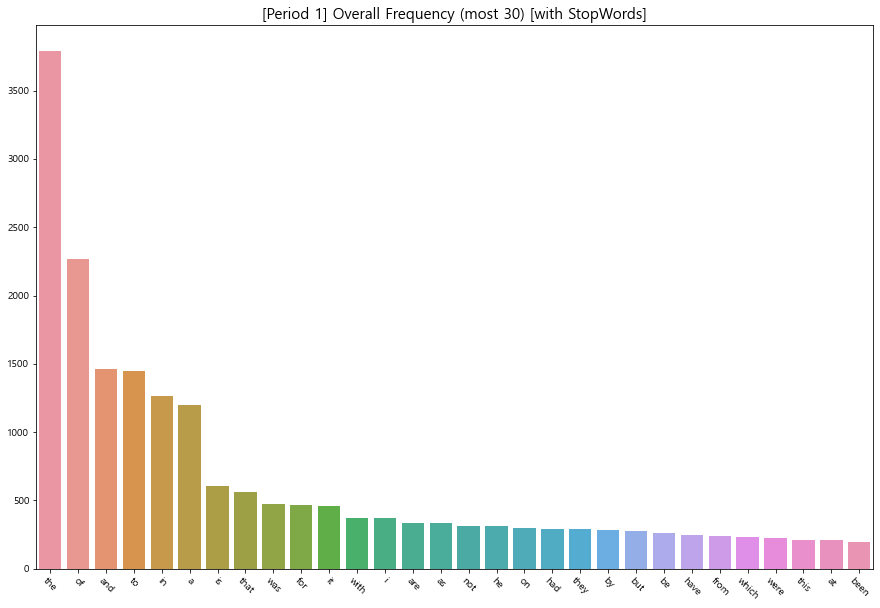

In [114]:
plotOverallFrequency(merged_1, filepath=RESULT_1, wo=False, period=1)

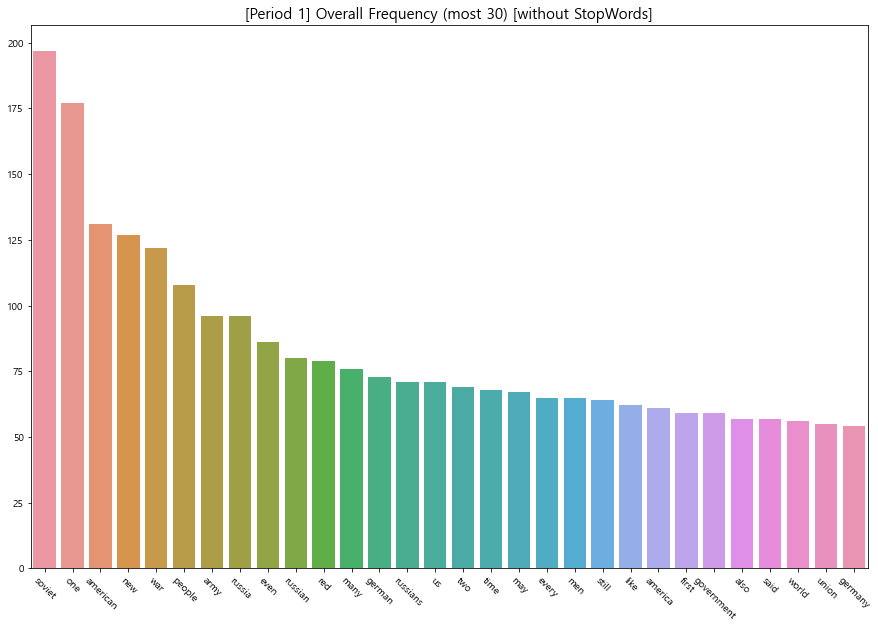

In [115]:
plotOverallFrequency(wo_merged_1, filepath=RESULT_1, wo=True, period=1)

#### Period 2

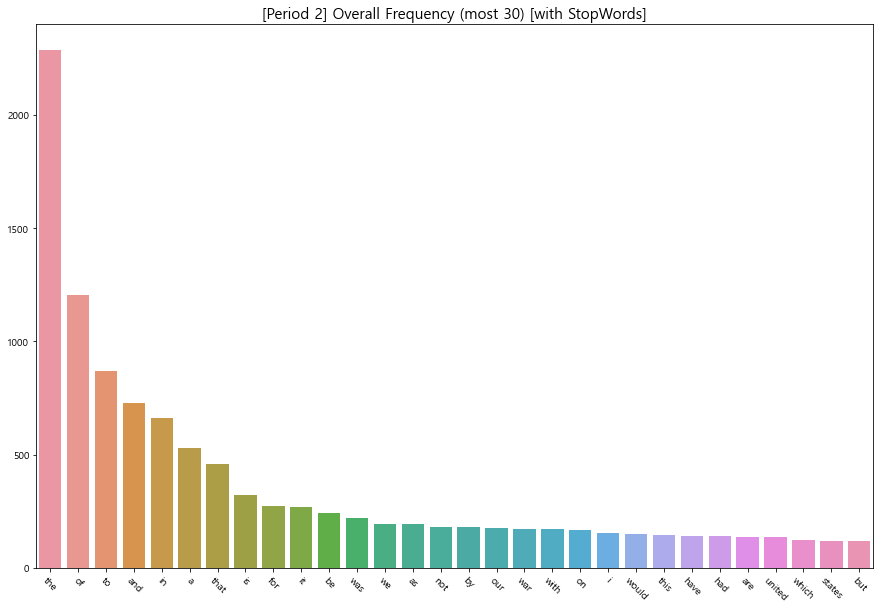

In [118]:
plotOverallFrequency(merged_2, filepath=RESULT_2, wo=False, period=2)

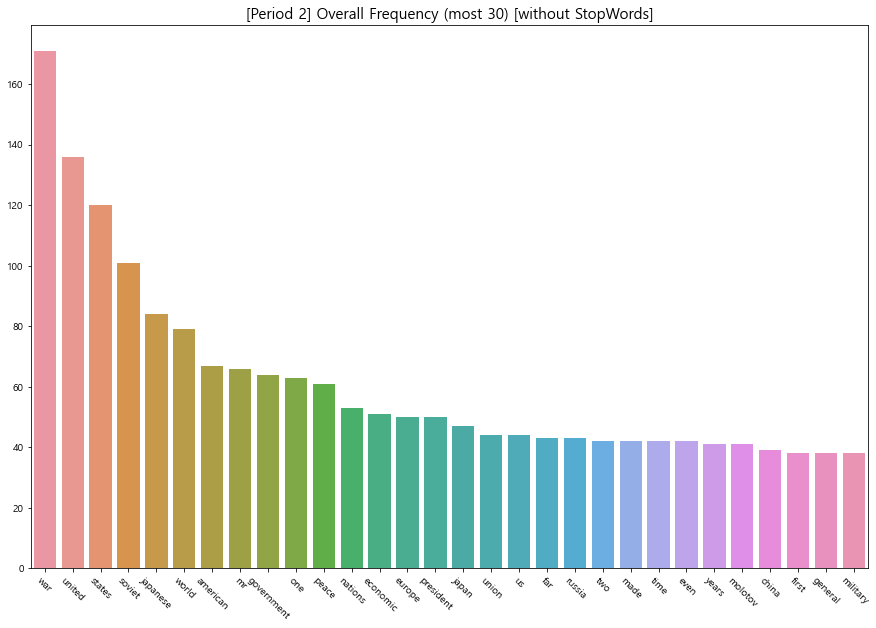

In [119]:
plotOverallFrequency(wo_merged_2, filepath=RESULT_2, wo=True, period=2)

#### Period 3

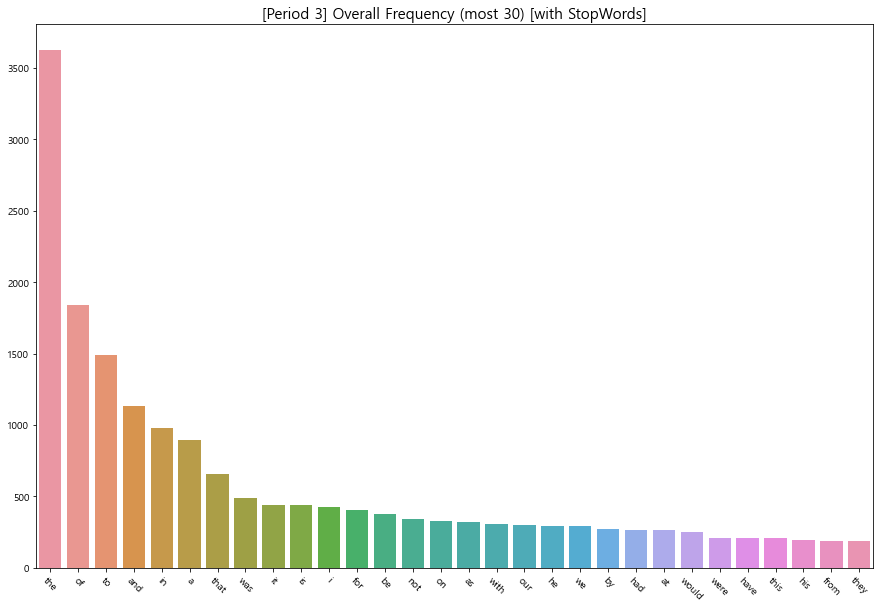

In [120]:
plotOverallFrequency(merged_3, filepath=RESULT_3, wo=False, period=3)

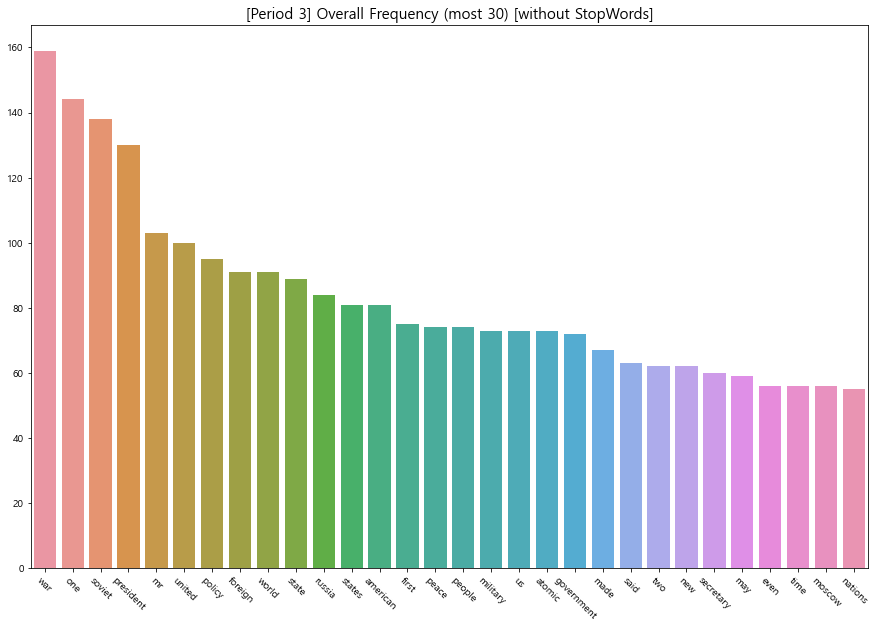

In [121]:
plotOverallFrequency(wo_merged_3, filepath=RESULT_3, wo=True, period=3)

### WordCloud

### Topic Modeling